In [7]:
import ai.condense3
import gensim
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn

import sklearn
import sklearn.svm
import sklearn.neural_network
import sklearn.ensemble
import sklearn.tree
import sklearn.neighbors
%matplotlib inline

We can first load the data, uncomment out the one you want. Notice there are two DataFrames, since we need training set and a testing set, `holdBackFraction` controls how large the testing set is.

In [2]:
holdBackFraction = .2

#trainDF, testDF = ai.condense3.loadSpam(holdBackFraction)
trainDF, testDF = ai.condense3.loadReddit(holdBackFraction)
#trainDF, testDF = ai.condense3.loadNewsGroups(holdBackFraction)
#trainDF, testDF = ai.condense3.loadObamaClinton(holdBackFraction)

Loading Reddit data
Converting to vectors


Now we can load the data into a classifier, there are lots of options and each has many parameters, so play with them and see how the results change. If you want a quick way of selcting your model look [here](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

In [3]:
#clf = sklearn.svm.SVC(kernel='linear', probability = True) #SVM
#clf = sklearn.ensemble.BaggingClassifier(n_estimators=10, bootstrap=True) #Bagging
#clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform') #K-nearest neighbors
clf = sklearn.naive_bayes.MultinomialNB(alpha=1.0) #Naive Bayes
#clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu') #Simple Neural Net
clf.fit(np.stack(trainDF['vect'], axis=1)[0], trainDF['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Now we have the model trained we can use our testing set to see how well it works.

First by looking at a couple of metrics:

In [4]:
ai.condense3.evaluateClassifier(clf, testDF)

,AP,PRE,RE,auc,error-rate
Weeaboo Tales: stories about the extreme fans of japanese culture,0.936576,0.892857,0.974026,0.968418,0.034483
Tales From Tech Support,0.982001,0.974026,0.986842,0.989306,0.009404
Bad Roommates: Tales of Irritation,0.948276,0.946667,0.934211,0.958875,0.028213
Relationships,0.922022,0.939759,0.866667,0.922416,0.053292


These metrics are generalized by the ROC curve, but the curve only works for some models.

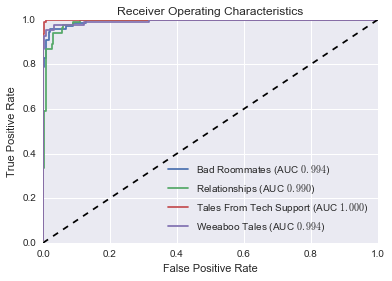

In [5]:
ai.condense3.plotMultiROC(clf, testDF)

We can also look at the confusion matrix to get a sense of where the models are getting things wrong:

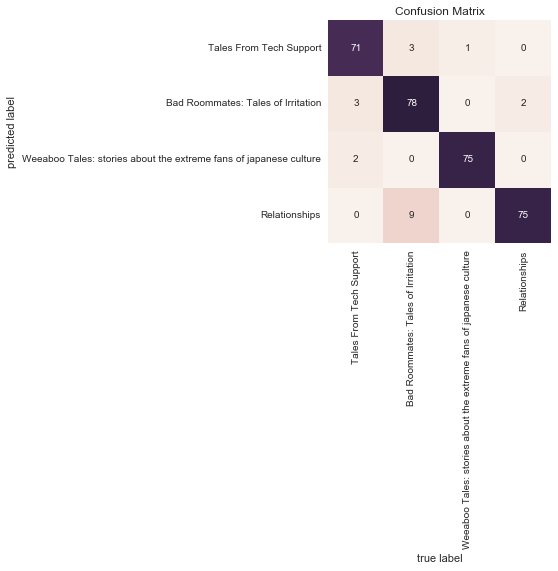

In [6]:
ai.condense3.plotConfusionMatrix(clf, testDF)